# Validation report for dmu26_XID+PACS_COSMOS_20170303

The data product dmu26_XID+PACS_COSMOS_20170303, contains three files:

1. dmu26_XID+PACS_COSMOS_20170303.fits: The catalogue file
2. dmu26_XID+PACS_COSMOS_20170303_Bayes_pval_PACS100.fits: The Bayesian pvalue map
3. dmu26_XID+PACS_COSMOS_20170303_Bayes_pval_PACS160.fits: The Bayesian pvalue map

## Catalogue Validation
Validation of the catalogue should cover the following as a minimum:

* Compare XID+ Fluxes with previous catalogues
* Check for sources with poor convergence (i.e. $\hat{R}$ >1.2 and $n_{eff}$ <40)
* Check for sources with strange error (i.e. small upper limit and large lower limit, which would be indicating prior is limiting flux)
* Check for sources that return prior (i.e. probably very large flux and large error)
* Check background estimate is similar across neighbouring tiles (will vary depending on depth of prior list)



In [1]:
from astropy.table import Table
import numpy as np
import pylab as plt
%matplotlib inline

In [2]:
table=Table.read('/Users/williamp/validation/cosmos/PACS/dmu26_XID+PACS_COSMOS_20170303.fits', format='fits')

In [3]:
table[:10].show_in_notebook()

idx,HELP_ID,RA,Dec,F_PACS_100,FErr_PACS_100_u,FErr_PACS_100_l,F_PACS_160,FErr_PACS_160_u,FErr_PACS_160_l*1000.0,Bkg_PACS_100,Bkg_PACS_160,Sig_conf_PACS_100,Sig_conf_PACS_160,Rhat_PACS_100,Rhat_PACS_160,n_eff_PACS_100,n_eff_PACS_160,Pval_res_100,Pval_res_160
,,degrees,degrees,mJy,mJy,mJy,mJy,mJy,mJy,MJy / sr,MJy / sr,MJy / sr,MJy / sr,,,,,,
0,HELP_J100019.68+012956.21,150.081982461,1.49894688148,0.165499659488,0.454144115793,0.0402466685046,6.04484556243,9.01419576257,0.00328089,0.954947,0.922036,0.496438,0.134244,0.998417,1.0019,2000.0,2000.0,1.0,0.0
1,HELP_J100022.32+012956.58,150.093019719,1.49904896278,0.378230499336,0.908303016331,0.0857893974171,0.41579187382,1.11066433601,0.000107954,0.954947,0.922036,0.496438,0.134244,0.998904,0.999649,2000.0,2000.0,1.0,0.0015
2,HELP_J100020.61+012956.18,150.085859377,1.49893773756,0.194308071514,0.525390496477,0.0445684127044,3.94020695239,6.73015136272,0.00172247,0.954947,0.922036,0.496438,0.134244,0.99847,1.00002,2000.0,2000.0,1.0,0.0
3,HELP_J100019.96+012958.61,150.083147288,1.49961385853,0.208110097446,0.554249505512,0.0521120527992,1.01182132494,2.46661296114,0.000228307,0.954947,0.922036,0.496438,0.134244,0.999653,1.00025,2000.0,2000.0,1.0,0.0
4,HELP_J100024.06+012959.33,150.100251231,1.4998144436,0.322804786265,0.817092717625,0.0807043543318,0.589141622186,1.46596308332,0.000146005,0.954947,0.922036,0.496438,0.134244,0.998957,1.00078,2000.0,2000.0,1.0,0.0355
5,HELP_J100023.65+013001.20,150.098528505,1.50033288163,0.605823006481,1.36854615994,0.168487851624,0.240177789237,0.641155638732,5.72788e-05,0.954947,0.922036,0.496438,0.134244,1.00017,0.999077,2000.0,2000.0,1.0,0.023
6,HELP_J100021.22+012958.28,150.088411566,1.4995229716,0.125120335724,0.32799350447,0.0313700220431,1.05594145134,2.47328146361,0.000293881,0.954947,0.922036,0.496438,0.134244,0.999561,0.99938,2000.0,2000.0,1.0,0.0
7,HELP_J100022.87+013002.79,150.09530976,1.50077368948,1.89557706472,2.88701569661,0.919760728721,0.23427020642,0.638925877865,5.44659e-05,0.954947,0.922036,0.496438,0.134244,1.00097,0.998518,2000.0,2000.0,1.0,0.041
8,HELP_J100024.58+013004.76,150.102425265,1.50132199264,0.991385662928,1.98723771609,0.31036263681,1.03455292992,2.57391063496,0.000285297,0.954947,0.922036,0.496438,0.134244,1.00052,0.999491,2000.0,2000.0,1.0,0.0


In [4]:
import seaborn as sns

:0: FutureWarning: IPython widgets are experimental and may change in the future.


### Comparison to previous catalogues
Using COSMOS2015 catalogue and matching to closest PACS objects within 1''

In [5]:
#table.sort('help_id')

COSMOS2015 = Table.read('/Users/williamp/validation/cosmos/PACS/COSMOS2015_Laigle+v1.1_wHELPids_PACS_red.fits')
COSMOS2015.sort('HELP_ID')

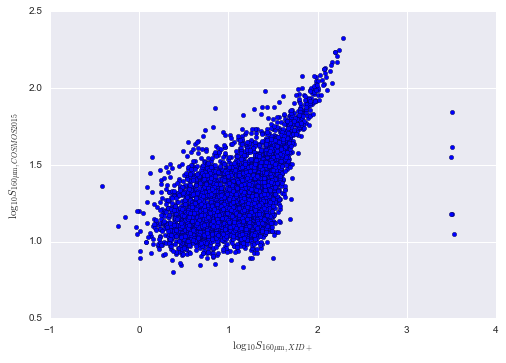

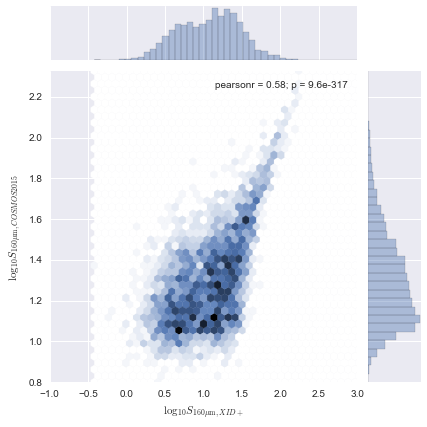

In [6]:
plt.scatter(np.log10(COSMOS2015['F_PACS_160']), np.log10(COSMOS2015['FLUX_160']))
plt.xlabel('$\log_{10}S_{160 \mathrm{\mu m}, XID+}$')
plt.ylabel('$\log_{10}S_{160 \mathrm{\mu m}, COSMOS2015}$')
plt.show()

plot=sns.jointplot(x=np.log10(COSMOS2015['F_PACS_160']), y=np.log10(COSMOS2015['FLUX_160']), xlim=(-1,3), kind='hex')
plot.set_axis_labels('$\log_{10}S_{160 \mathrm{\mu m}, XID+}$', '$\log_{10}S_{160 \mathrm{\mu m}, COSMOS2015}$')
plt.show()

Agreement is reasonable good. Lower flux objects can be given lower flux density by XID+ as would be expecetd. High flux density objects have a convergance in XID+ and COSMOS2015 as would be expected.

### Convergence Statistics
e.g. How many of the objects satisfy critera? 
(note Some of the $\hat{R}$ values are NaN. This is a PyStan bug. They are most likely 1.0

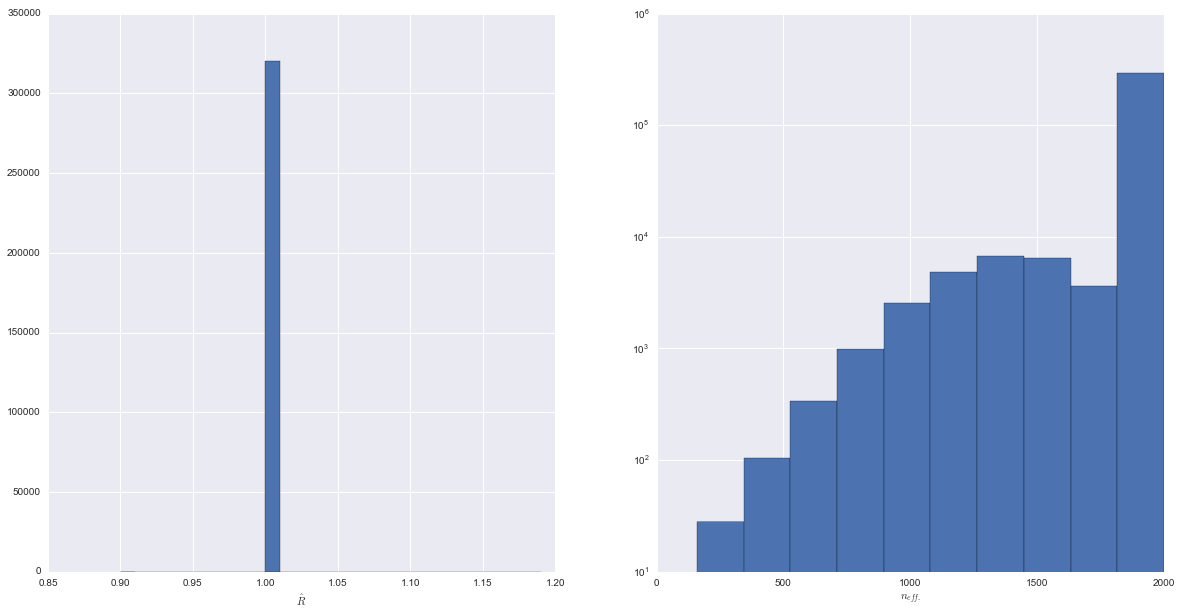

In [7]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
Rhat=plt.hist(np.isfinite(table['Rhat_PACS_160']), bins=np.arange(0.9,1.2,0.01))
plt.xlabel(r'$\hat{R}$')
plt.subplot(1,2,2)
neff=plt.hist(table['n_eff_PACS_160'])
plt.yscale('log')
plt.xlabel(r'$n_{eff.}$')

In [8]:
numRhat = 0
numNeff = 0

for i in range(0, len(table)):
    if table['Rhat_PACS_160'][i] > 1.2 and np.isfinite(table['Rhat_PACS_160']):
        numRhat += 1
    if table['n_eff_PACS_160'][i] < 40:
        numNeff += 1
        
print(str(numRhat)+' objects have $\hat{R}$ > 1.2')
print(str(numNeff)+' objects have n$_{eff}$ < 40')

0 objects have $\hat{R}$ > 1.2
0 objects have n$_{eff}$ < 40


All objects have good $\hat{R}$ and n$_{eff}$ values

### Skewness

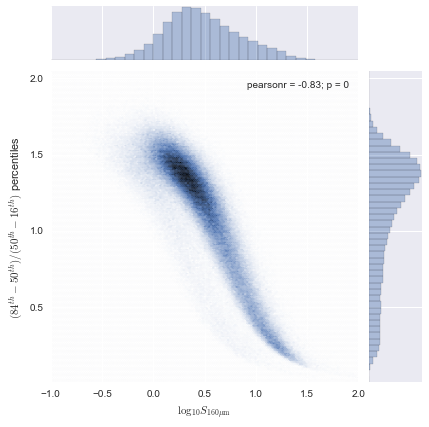

In [9]:
plot=sns.jointplot(x=np.log10(table['F_PACS_160']), y=(table['FErr_PACS_160_u']-table['F_PACS_160'])/(table['F_PACS_160']-table['FErr_PACS_160_l*1000.0']), xlim=(-1,2), kind='hex')
plot.set_axis_labels(r'$\log_{10}S_{160 \mathrm{\mu m}}$ ', r'$(84^{th}-50^{th})/(50^{th}-16^{th})$ percentiles')


### Sources where posterior=prior
Suggest looking at size of errors to diagnose. How many appear to be returning prior? Where are they on Bayesian P value map? Does it make sense why?

The lower errors appear to be very, very small. The catalogue appears to have them multiplied by 1000 and they are still 10\,000 times smaller than the upper errors.

### Background value
Are all the background values similar? For those that aren't is it obvious why? (e.g. edge of map, extended source not fitted well etc)

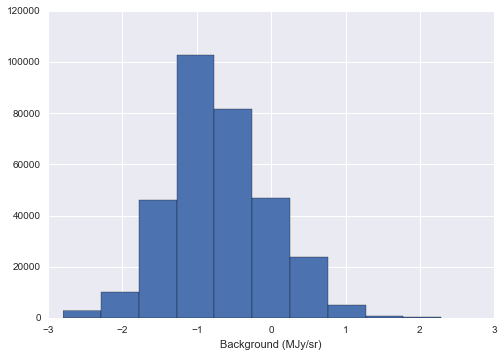

In [10]:
plt.hist(table['Bkg_PACS_160'])
plt.xlabel(r'Background (MJy/sr)')
plt.show()

The background seems to have quite a large scatter but roughly consistent around ~-1.0

-------------
## Bayesian P value map
The Bayesian P value map can be thought of as a more robust residual map. They provide the probability our model would obtain the pixel data value, having inferred our model on the data. The probabilitiy value is expressed in terms of a sigma value. 

* a value of < -2 indicates that our model cannot explain why there is so little flux in the map
* a value of > -2 indicates our model cannot explain why there is so much flux in the map 
* a value of ~ 0 indicates a good fit

Plotting the distribution of the Bayesian P value map can indicate whether the map has been been fit well in general. If the distribution is centered on 0 and roughly symmetric then it is a good fit.

Suggested validation checks: 

* Check distribution is reasonable
* Check for strange areas in map

In [5]:
import aplpy
from astropy.io import fits

In [3]:
hdulist=fits.open('/Users/williamp/validation/cosmos/PACS/dmu26_XID+PACS_COSMOS_20170303_Bayes_pval_PACS160.fits')

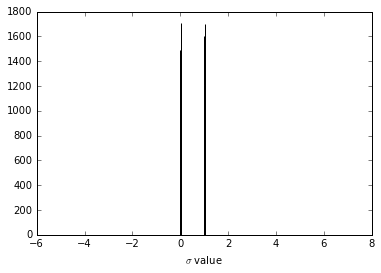

In [5]:
plt.figure()
Bayes_hist=plt.hist(np.isfinite(hdulist[1].data), bins=np.arange(-6,6.1,0.05))
plt.xlabel(r'$\sigma$ value')

In [6]:
plt.show()

#Checking the Positions
Using the PACS map to check where the high flux objects and objects with highish bakground are.

In [6]:
hdulist = fits.open('/Users/williamp/dev/XID_plus/input/cosmosKs/pep_COSMOS_red_Map.DR1.fits')

hdulist[1].header['CTYPE1'] = 'RA'
hdulist[1].header['CTYPE2'] = 'DEC'

PACS_red map is in greyscale, object positions are in blue, objects with fluxes > 1e3 are in red, objects with background values > 1.25 MJy/sr are in yellow, objects with P-values > 0.5 are in green.

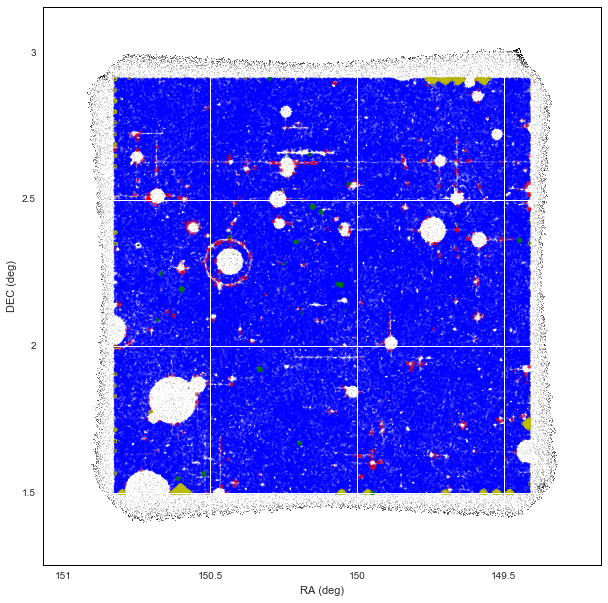

In [7]:
vmin=0.0001
vmax=0.02
fig = plt.figure(figsize=(30,10))
pltut = aplpy.FITSFigure(hdulist[1], figure=fig)

pltut.show_colorscale(vmin=vmin,vmax=vmax,cmap='Greys',stretch='log')

pltut.show_circles(table['RA'],table['Dec'], radius=0.0025, color='b')

bRA = []
bDec = []
for i in range(0, len(table)):
    if table['F_PACS_160'][i] > 1e3:
        bRA.append(table['RA'][i])
        bDec.append(table['Dec'][i])
if len(bRA) > 0:
    pltut.show_circles(bRA, bDec, radius=0.005, color='r')

bgRA = []
bgDec = []
for i in range(0, len(table)):
    if table['Bkg_PACS_160'][i] > 1.25:
        bgRA.append(table['RA'][i])
        bgDec.append(table['Dec'][i])
if len(bgRA) > 0:
    pltut.show_circles(bgRA, bgDec, radius=0.005, color='y')

pRA = []
pDec = []
for i in range(0, len(table)):
    if table['Pval_res_160'][i] > 0.5:
        pRA.append(table['RA'][i])
        pDec.append(table['Dec'][i])
if len(pRA) > 0:
    pltut.show_circles(pRA, pDec, radius=0.005, color='g')

plt.show()

The high flux value objects (red) appear to mainly cluster arround the edges of the masked regions, so may just be artefacts of bad masking.

The high background objects (yellow) appear to be a property of individual tiles as they form squares on the image above. These tiles are on the edge of the map and the high background is probably a result of this.

The high P-value objects (green) appear arround brighter objects (but not all bright objects) which makes sense; bright blended objects are harder to deblend than non-blended objects. They also often coincide with the high background tiles.